In [ ]:
import numpy as np
import pandas as pd
import kagglehub
import os

path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
path = os.path.join(path, "Mall_Customers.csv")

data = pd.read_csv(path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 3.08MB/s]

Extracting files...


In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


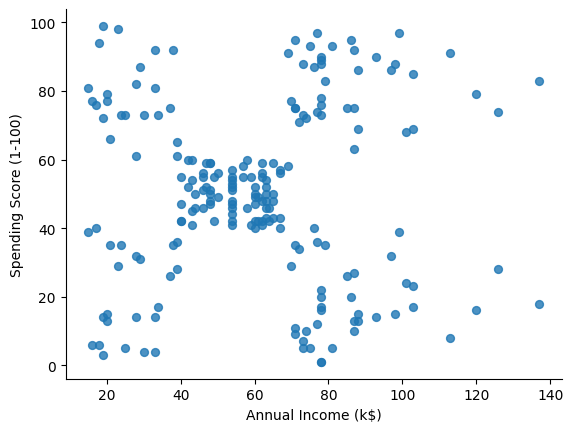

In [ ]:
# @title Annual Income (k$) vs Spending Score (1-100)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Проверим данные на пропуски и дубликаты

In [ ]:
print("Пропуски в данных:")
print(data.isnull().sum())

print("Дубликаты:")
print(data.duplicated().sum())

Пропуски в данных:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Дубликаты:
0


#Стандартизируем данные при помощи Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Стандартизированные данные:")
print(scaled_features[:5])

Стандартизированные данные:
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


#Рассчитаем  количество кластеров при помощи метода локтя

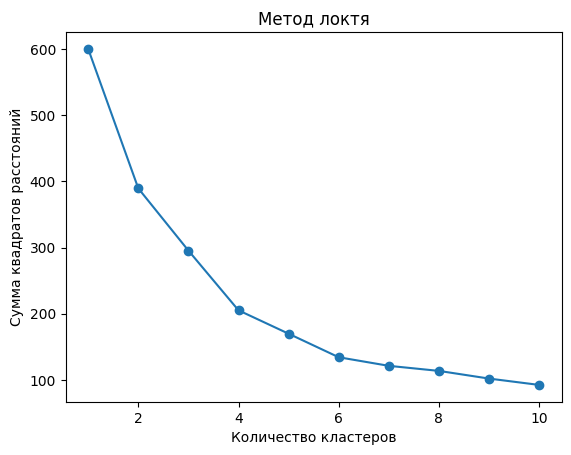

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

Оптимальное число кластеров равно 5,т.к. в этой точке инерция начинает замедляться

#Коэффициент силуэта

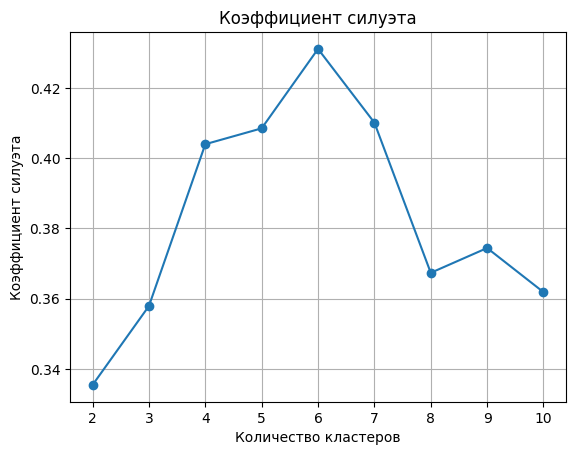

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.grid(True)
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.show()

В данном случае наилучшее число кластеров равняется 6


##Обучим все 3 модели кластеризации на 5 и 6 кластеров, кластеров, кроме DBSCAN, который сам определяет нужное число кластеров

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt

kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5_labels = kmeans_5.fit_predict(scaled_features)

kmeans_6 = KMeans(n_clusters=6, random_state=42)
kmeans_6_labels = kmeans_6.fit_predict(scaled_features)

agg_clust_5 = AgglomerativeClustering(n_clusters=5)
agg_clust_5_labels = agg_clust_5.fit_predict(scaled_features)

agg_clust_6 = AgglomerativeClustering(n_clusters=6)
agg_clust_6_labels = agg_clust_6.fit_predict(scaled_features)

dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(scaled_features)

#Визуализация иерархической кластеризации

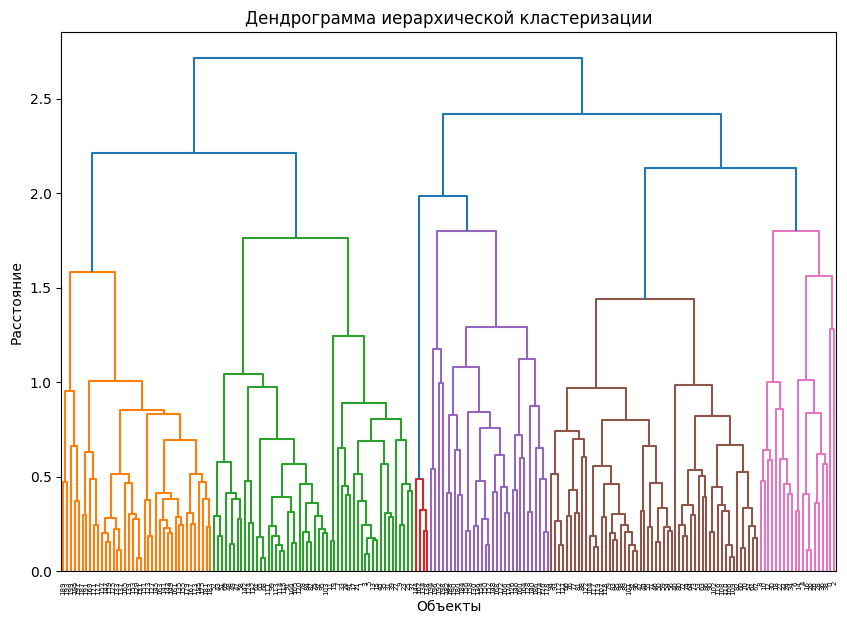

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(scaled_features, method='average')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()


#Визуализируем результаты

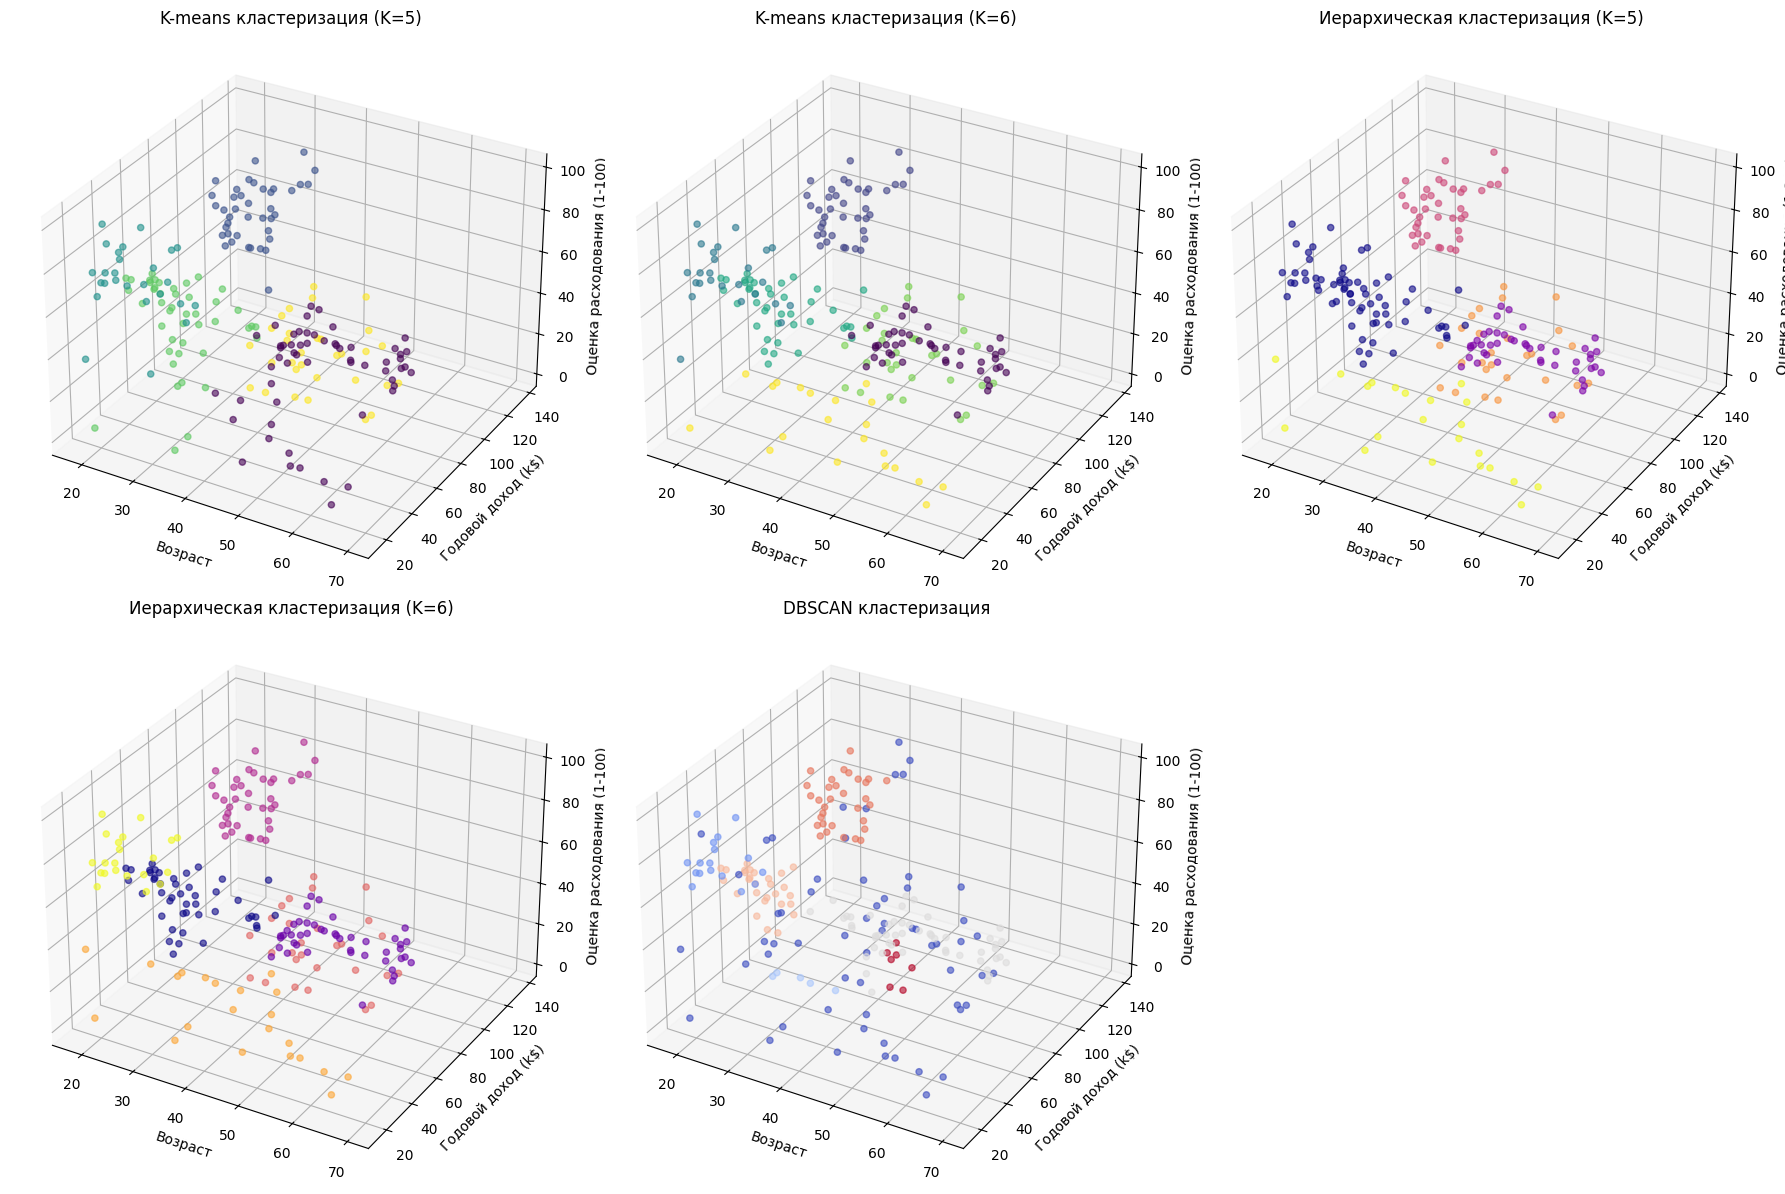

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 12))


# K-means для 5 кластеров
ax1 = fig.add_subplot(231, projection='3d')
ax1.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmeans_5_labels, cmap='viridis', alpha=0.6)
ax1.set_title('K-means кластеризация (K=5)')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Годовой доход (k$)')
ax1.set_zlabel('Оценка расходования (1-100)')

# K-means для 6 кластеров
ax2 = fig.add_subplot(232, projection='3d')
ax2.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmeans_6_labels, cmap='viridis', alpha=0.6)
ax2.set_title('K-means кластеризация (K=6)')
ax2.set_xlabel('Возраст')
ax2.set_ylabel('Годовой доход (k$)')
ax2.set_zlabel('Оценка расходования (1-100)')

# Иерархическая кластеризация для 5 кластеров
ax3 = fig.add_subplot(233, projection='3d')
ax3.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=agg_clust_5_labels, cmap='plasma', alpha=0.6)
ax3.set_title('Иерархическая кластеризация (K=5)')
ax3.set_xlabel('Возраст')
ax3.set_ylabel('Годовой доход (k$)')
ax3.set_zlabel('Оценка расходования (1-100)')

# Иерархическая кластеризация для 6 кластеров
ax4 = fig.add_subplot(234, projection='3d')
ax4.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=agg_clust_6_labels, cmap='plasma', alpha=0.6)
ax4.set_title('Иерархическая кластеризация (K=6)')
ax4.set_xlabel('Возраст')
ax4.set_ylabel('Годовой доход (k$)')
ax4.set_zlabel('Оценка расходования (1-100)')

# DBSCAN кластеризация
ax5 = fig.add_subplot(235, projection='3d')
ax5.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=dbscan_labels, cmap='coolwarm', alpha=0.6)
ax5.set_title('DBSCAN кластеризация')
ax5.set_xlabel('Возраст')
ax5.set_ylabel('Годовой доход (k$)')
ax5.set_zlabel('Оценка расходования (1-100)')

plt.tight_layout()
plt.show()


Из визуализации видно, что DBSCAN показал себя хуже всех, кластеры получились нечёткие. Лучше показала себя иерархическая кластеризация для 5 и 6 кластеров, кластеры имеют чёткие границы. K-means для 5 кластеров выглядит не особо, видно, что не хватает кластеров. K-means для 6 выглядит лучше

#Посчитаем метрики

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

methods = [
    ('K-means (K=5)', kmeans_5_labels),
    ('K-means (K=6)', kmeans_6_labels),
    ('Иерархическая (K=5)', agg_clust_5_labels),
    ('Иерархическая (K=6)', agg_clust_6_labels),
    ('DBSCAN', dbscan_labels)
]

metrics = []

for method, labels in methods:
    silhouette = silhouette_score(scaled_features, labels) if len(set(labels)) > 1 else -1
    db_score = davies_bouldin_score(scaled_features, labels)
    metrics.append((method, silhouette, db_score))

print(f"{'Метод':<25} {'Силуэт':<10} {'DB Score':<10}")
print("-" * 50)
for method, silhouette, db_score in metrics:
    print(f"{method:<25} {silhouette:<10.3f} {db_score:<10.3f}")


Метод                     Силуэт     DB Score  
--------------------------------------------------
K-means (K=5)             0.408      0.889     
K-means (K=6)             0.431      0.835     
Иерархическая (K=5)       0.390      0.916     
Иерархическая (K=6)       0.420      0.852     
DBSCAN                    0.185      1.757     


Из результатов видно, что наибольшие значения показателя Силуэт(что указывает на лучшее качество кластеризации) имеют модели K-means (K=6) и Иерархическая (K=6), что означает, что эти методы создают более однородные кластеры. DBSCAN имеет значительно более низкое значение, что свидетельствует о худшем качестве кластеризации, возможно, из-за чувствительности к шуму и несоответствия данных предположениям модели. В то же время, DBSCAN имеет наихудший результат по метрике DB Score, что указывает на высокую степень разделимости кластеров, но с потенциальными проблемами в точности. В целом, методы K-means и Иерархическая (K=6) показывают лучшие результаты, чем DBSCAN, по обеим метрикам.